In [1]:
import pandas as pd
import seaborn as sns

from math import floor
from copy import deepcopy

import random

In [2]:
# Настройка для более красивого отображения графиков с помощью seaborn.
sns.set(rc={'figure.figsize': (9, 6)})

In [3]:
def custom_compare(x, y):
    if str(x) != str(y):
        raise RuntimeError(f'Ожидаемое значение: {y}. Фактическое: {x}')

In [4]:
class ShuffleOnceRandom():
    """
    Генератор случайных чисел, который запрещает использовать
    функцию shuffle больше одного раза.
    """
    
    def __init__(self, seed=None):
        import random
        
        self._random_gen = random.Random(seed)
        self._shuffle_cnt = 0
        
    def shuffle(self, l):
        if self._shuffle_cnt > 0:
            raise RuntimeError('Нельзя использовать функцию shuffle больше одного раза')
            
        self._shuffle_cnt += 1
        self._random_gen.shuffle(l)

In [5]:
class ShuffleNRandom():
    """
    Генератор случайных чисел, который запрещает использовать
    функцию shuffle больше n раз.
    """
    
    def __init__(self, n, seed=None):
        import random
        
        self._n = n
        self._random_gen = random.Random(seed)
        self._shuffle_cnt = 0
        
    def shuffle(self, l):
        if self._shuffle_cnt > self._n:
            raise RuntimeError('Нельзя использовать функцию shuffle больше одного раза')
            
        self._shuffle_cnt += 1
        self._random_gen.shuffle(l)

# Лекция 3. Как разбить пользователей на группы

## Задание 1

In [14]:
seed = 42
random_numbers_gen = random.Random(seed)
random_numbers_gen.random()

0.6394267984578837

In [27]:
ShuffleOnceRandom().

In [58]:
from copy import deepcopy
from math import floor

def split_solution(data, 
                   frac,
                   random_gen):
    """
    Разбивает переданный список объектов на две выборки.
    
    Аргументы:
        data: Список объектов, который нужно разделить на выборки.
        frac: Доля объектов, которые нужно отправить в первую выборку.
        random_gen: Генератор случайных чисел.
        
    Возвращаемое значение:
        Пара списков: первая выборка, вторая выборка.
    """
    rng_data = deepcopy(data)
    random_gen.shuffle(rng_data)
    a_frac = floor(len(rng_data) * frac)
    return (rng_data[ : a_frac], rng_data[a_frac : ])    

In [59]:
def split_tests():
    example_1_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    example_1_frac = 0.7
    example_1_random_gen = ShuffleOnceRandom(0)
    
    example_1_res = [8, 9, 2, 6, 4, 5, 3], [1, 10, 7]
    
    custom_compare(split_solution(example_1_data, 
                                  example_1_frac, 
                                  example_1_random_gen),
                   example_1_res)
    
    
    example_2_data = [i % 5 for i in range(100)]
    example_2_frac = 0.9
    example_2_random_gen = ShuffleOnceRandom(0)
    
    example_2_res = [3, 3, 1, 2, 3, 3, 1, 1, 4, 4, 1, 3, 2, 1, 0, 2, 2, 2, 3, 1, 4, 1, 4, 0, 4, 0, 2, 4, 3, 2, 3, 1, 3, 4, 1, 3, 4, 3, 4, 4, 4, 0, 4, 0, 0, 1, 1, 1, 2, 2, 3, 0, 4, 0, 3, 1, 1, 0, 2, 0, 3, 2, 3, 0, 1, 0, 1, 0, 0, 4, 0, 1, 0, 2, 4, 2, 4, 3, 2, 3, 2, 4, 2, 0, 1, 2, 4, 2, 4, 0], [1, 3, 1, 2, 0, 3, 0, 3, 2, 4]
    
    custom_compare(split_solution(example_2_data, 
                                  example_2_frac, 
                                  example_2_random_gen),
                   example_2_res)
    
    print('Все тесты прошли успешно!')

In [60]:
split_tests()

Все тесты прошли успешно!


# Лекция 4. Элементы математической статистики

In [61]:
general_vals = pd.read_csv('datasets/sirius/general_vals.csv')

## Задание 1

Постройте график распределения значений из колонки `metric` и вычислите среднее значение в колонке.

In [64]:
general_vals.mean()

metric   -0.01712
dtype: float64

/home/azor/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

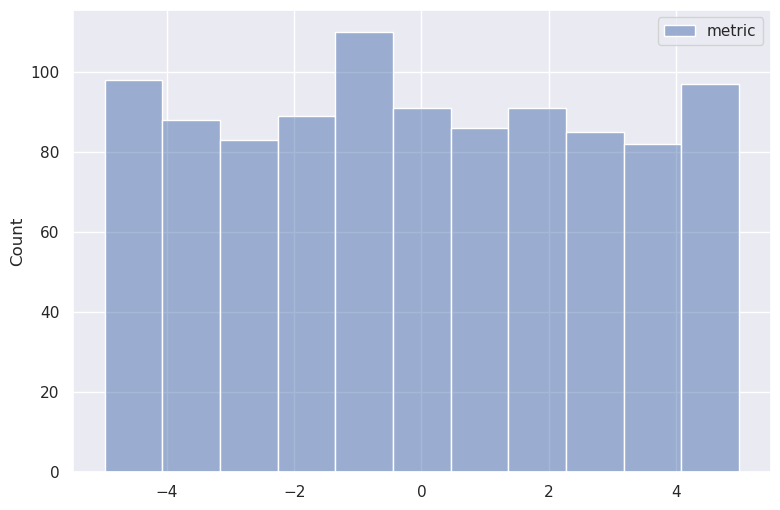

In [63]:
sns.histplot(general_vals)

## Задание 2

Будем рассматривать значения из колонки `metric` как некоторую генеральную совокупность.

Используя реализованную в рамках предыдущих заданий модуля функцию `split_solution`, создайте случайную выборку, размер которой равен `0.03` от размера всей генеральной совокупности. Для этого воспользуйтесь данным в блокноте генератором случайных чисел — `task_2_random_gen`. В качестве искомой выборки возьмите первую выборку из результата работы функции `split_solution`.

Вычислите разность выборочного среднего и среднего в генеральной совокупности. В качестве ответа укажите модуль этой разности, округлённый до $2$ знаков после запятой. В процессе вычисления средние не округляйте.

**Рекомендации по решению**

Важно, что значения из генеральной совокупности удобно поместить из колонки в список. Сделать это можно с помощью функции `list`:
```
metric_l = list(general_vals.metric)
```

In [73]:
task_2_random_gen = ShuffleOnceRandom(0)
metric_l = list(general_vals.metric)
a_rnd = split_solution(metric_l, 0.03, task_2_random_gen)[0]

In [90]:
gen_mean = general_vals.metric.mean()
a_mean = sum(a_rnd) / len(a_rnd)
round(a_mean - gen_mean, 2)

0.1

## Задание 3

Сгенерируйте $1000$ случайных выборок из генеральной совокупности размера $0.03$ от её размера, воспользовавшись заготовкой ниже.

Постройте график распределения выборочных средних и вычислите разность среднего в полученном распределении выборочных средних и среднего в генеральной совокупности.

In [91]:
N = 1000
frac = 0.03

In [92]:
task_3_random_gen = ShuffleNRandom(N, seed=1)

In [93]:
random_samples = []

for i in range(N):
    random_sample, _ = split_solution(metric_l, frac, task_3_random_gen)
    random_samples.append(random_sample)

In [95]:
random_samples_means = []

for samples in random_samples:
    random_samples_means.append(sum(samples) / len(samples))

/home/azor/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


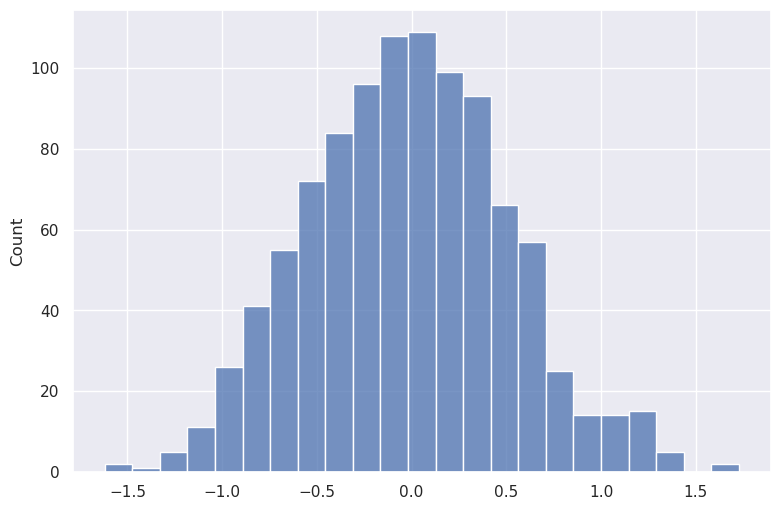

In [97]:
sns.histplot(random_samples_means);

In [100]:
gen_mean = general_vals.metric.mean()
mean_of_random_means = sum(random_samples_means) / len(random_samples_means)
round(abs(mean_of_random_means - gen_mean), 3)

0.004

# Лекция 7. Статистическая проверка гипотез на практике

In [101]:
# !pip3 install scipy
import scipy
scipy.__version__

'1.11.4'

In [102]:
ab_data = pd.read_csv('datasets/sirius/ab_data.csv')

## Задание 1

Как вы узнали из лекции, одним из условий использования t-теста является то, что дисперсии в сравниваемых группах должны быть равны. Проверить равенство дисперсий в генеральных совокупностях, соответствующих конкретным выборкам, можно с помощью отдельного статистического теста — теста Левена, который проверяет нулевую гипотезу о равенстве дисперсий в двух распределениях.

Проверьте гипотезу о равенстве дисперсий в контрольной и экспериментальной группах. Для этого импортируйте из библиотеки `scipy` тест Левена:
```
from scipy.stats import levene
```

После этого запустите функцию `levene`, передав в качестве первого её аргумента список значений метрики из выборки, соответствующей контрольной группе, а в качестве второго аргумента — список значений метрики из выборки, соответствующей экспериментальной группе.

В результате работы функция вернёт пару чисел: значение статистики теста, рассчитанной для наших данных, а также значение p-value для наших данных.

In [103]:
from scipy.stats import levene

In [121]:
control_data = ab_data[ab_data.group == 'control']
treatment_data = ab_data[ab_data.group == 'treatment']
l_result = levene(control_data.metric, treatment_data.metric)
print(f'Статистика Левена: {l_result[0]:.02f}, \nH0-гипотеза: {l_result[1] > 0.01}')

Статистика Левена: 107.67, 
H0-гипотеза: False


## Задание 2

Теперь можно переходить к сравнению средних значений метрики в двух группах с помощью t-теста.

Чтобы импортировать его из библиотеки `scipy`, воспользуйтесь следующим кодом:
```
from scipy.stats import ttest_ind
```

Аналогично функции `levene` функция `ttest_ind` принимает на вход списки значений метрики для двух выборок, а возвращает пару значений — статистику теста и значение p-value.

У функции `ttest_ind` есть дополнительный аргумент `equal_var`, который по умолчанию равен `True`. Этот аргумент отвечает за то, будет ли использоваться при сравнении двух выборок t-тест Уэлча, учитывающий возможную разницу между дисперсиями распределений. В случае, если значение `equal_var = True`, используется обычный вариант t-теста, в случае, если значение равно `False`, используется t-тест Уэлча.

В рамках задания установите параметр `equal_var = False` в случае, если тест Левена в предыдущем задании позволил вам отклонить нулевую гипотезу о равенстве дисперсий на заданном уровне значимости $\alpha = 0.01$.

In [122]:
from scipy.stats import ttest_ind

In [126]:
tt_result = ttest_ind(control_data.metric, treatment_data.metric, equal_var=False)
tt_result

TtestResult(statistic=-21.309858122923494, pvalue=4.593232942709043e-90, df=1805.2246374875774)

In [127]:
round(tt_result[0], 2)

-21.31

In [128]:
tt_result[0] > 0.01

False